<a href="https://colab.research.google.com/github/BeheshteSadeghi/HousePricePrediction-including-Pycaret-LightGBM-Pipeline-and-Web-Application/blob/main/HousePricePrediciton_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib==3.8.0


In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import re
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import lightgbm as lgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

import joblib

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install --pre pycaret -q

In [ ]:
pip install autoviz -q

In [4]:
pip install shap -q

In [5]:
from pycaret.regression import *

In [6]:
df = pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [7]:
df.shape

(3479, 8)

In [8]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [9]:
df.sample(6)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
526,320,4,True,True,True,Saadat Abad,40000000000,1333333.33
3184,210,3,True,True,True,Kamranieh,34560000000,1152000.00
1835,60,2,True,True,True,West Ferdows Boulevard,2850000000,95000.00
2332,100,2,True,True,False,Pardis,2700000000,90000.00
2907,78,2,True,True,True,Keshavarz Boulevard,3500000000,116666.67
196,210,3,True,True,True,Pasdaran,15750000000,525000.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [11]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [12]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [13]:
df.dropna(inplace = True)

In [14]:
df.Area.unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [15]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 172.1+ KB


In [17]:
df.describe()

,Area,Room,Price,Price(USD)
count,3.456000e+03,3456.000000,3.456000e+03,3.456000e+03
mean,8.802191e+06,2.081308,5.379957e+09,1.793319e+05
std,3.177783e+08,0.759723,8.121729e+09,2.707243e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.420000e+09,4.733333e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.210000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


In [18]:
print(df.Parking.value_counts(normalize = True)*100)

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64


In [19]:
print(df.Elevator.value_counts(normalize = True)*100)

Elevator
True     78.732639
False    21.267361
Name: proportion, dtype: float64


In [20]:
print(df.Warehouse.value_counts(normalize = True)*100)

Warehouse
True     91.493056
False     8.506944
Name: proportion, dtype: float64


In [21]:
pd.crosstab(df.Elevator, df.Room)

Room,0,1,2,3,4,5
Elevator,,,,,,
False,8,282,352,49,17,27
True,2,387,1591,682,53,6


In [22]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [23]:
pd.crosstab(df.Warehouse, df.Room)

Room,0,1,2,3,4,5
Warehouse,,,,,,
False,5,109,149,21,3,7
True,5,560,1794,710,67,26


In [24]:
above_3Rooms = df[df.Room>3]
len(above_3Rooms)

103

In [25]:
below_90m2 = df[df.Area<90]
len(below_90m2)

1673

In [26]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [27]:
len(df.Address.unique())

192

In [28]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df.groupby("Room").Price.mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [29]:
room_parking_price_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_price_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [30]:
df2 = df.copy()
df2.loc[:,"Price"] = df["Price"].map("{:,.0f}".format)
df2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333


In [31]:
df = df.drop("Price(USD)", axis = 1)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


### **Pycaret**

In [32]:
setup(data = df,target = "Price", session_id = 85, remove_outliers = True)

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3456, 7)"
4,Transformed data shape,"(3335, 7)"
5,Transformed train set shape,"(2298, 7)"
6,Transformed test set shape,"(1037, 7)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [33]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [34]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1413985111.3255,17119527634856341504.0000,3830271713.6693,0.7595,0.4517,0.6320,1.3710
rf,Random Forest Regressor,1388250556.3407,16988505268642029568.0000,3824443752.2675,0.7570,0.4547,0.8432,0.8830
et,Extra Trees Regressor,1442381731.0889,17611020703202566144.0000,3950342259.3451,0.7366,0.4736,0.6643,0.5320
gbr,Gradient Boosting Regressor,1494386122.2408,18764129032214884352.0000,3990795190.6730,0.7348,0.4995,1.0529,0.5040
xgboost,Extreme Gradient Boosting,1388440204.3479,19065546447575371776.0000,4035564136.8460,0.7293,0.4492,0.4666,0.9990
ada,AdaBoost Regressor,2248494410.6656,19117225871453396992.0000,4179198607.2051,0.7029,0.8582,1.9363,0.2970
knn,K Neighbors Regressor,1534804422.8598,21740096166900363264.0000,4326753196.0612,0.6928,0.4660,0.4922,0.2290
dt,Decision Tree Regressor,1632649248.2116,23890900455591821312.0000,4568925703.7867,0.6511,0.5371,0.5950,0.2300
br,Bayesian Ridge,2768329572.8473,39092307751268532224.0000,5931791270.3155,0.4206,0.9086,1.5131,0.2320
omp,Orthogonal Matching Pursuit,2768616042.7197,39090807434628833280.0000,5931704214.5995,0.4206,0.9065,1.5134,0.2700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=85)

### **Visualization**

In [35]:
#!pip install matplotlib==3.7.1

<Figure size 800x500 with 0 Axes>

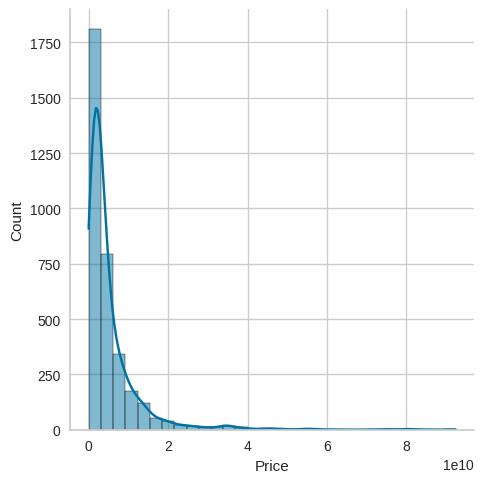

In [36]:
plt.figure(figsize = (8,5))
sns.displot(df["Price"], bins = 30, kde = True)

In [37]:
c = list(df.columns)
print(c)

['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price']


<Axes: >

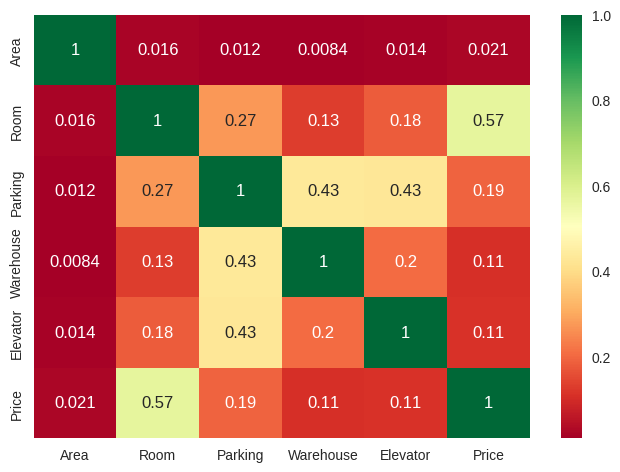

In [38]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')
numerical_cols = [c for c in df.columns if df[c].dtype in [float, int] ]
df_num = df[numerical_cols]
sns.heatmap(df_num.corr(), annot = True, cmap = "RdYlGn")

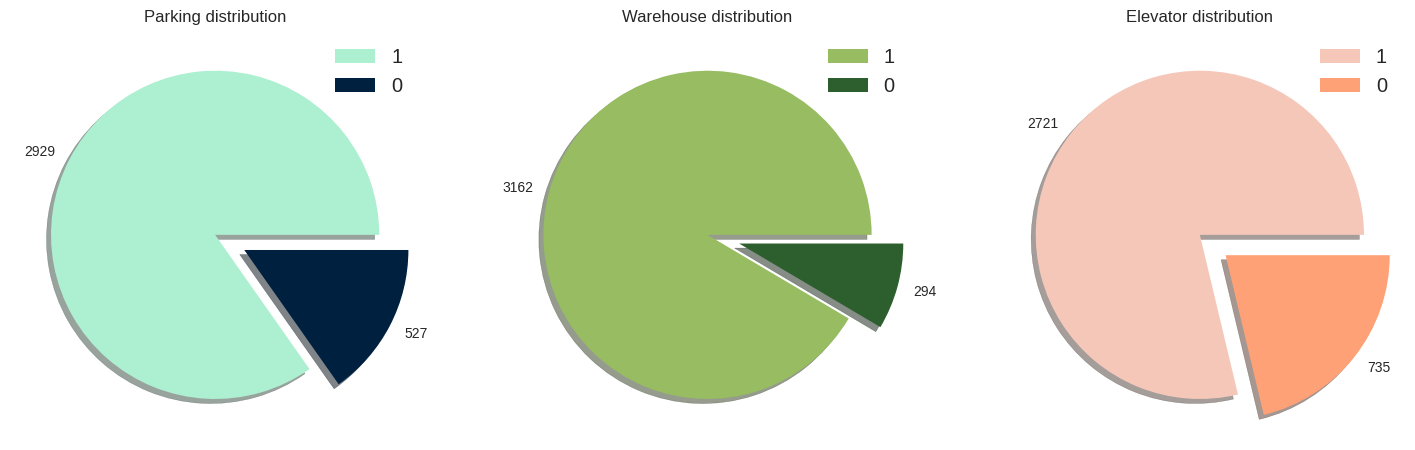

In [39]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

Text(0.5, 1.0, 'Number of flats in location')

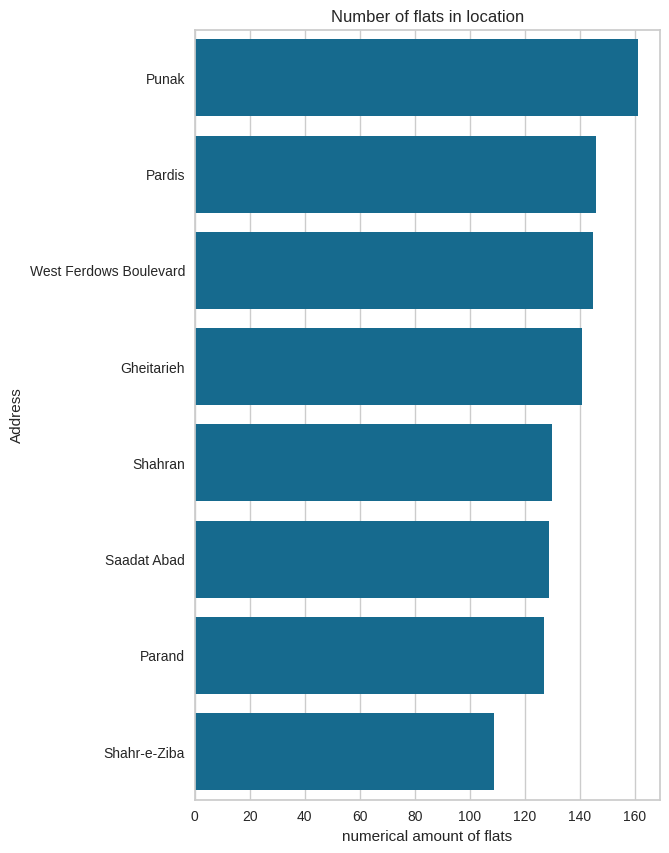

In [40]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')

In [41]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


# Model Building

In [42]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df_final


,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83,2,1,1,1,6800000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75,2,0,0,0,365000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105,2,1,1,1,5600000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df_final.to_csv('HPPdata.csv')

In [45]:
print(f"Skewness of features:\n{df_num.skew()}")


Skewness of features:
Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


<Axes: xlabel='Price'>

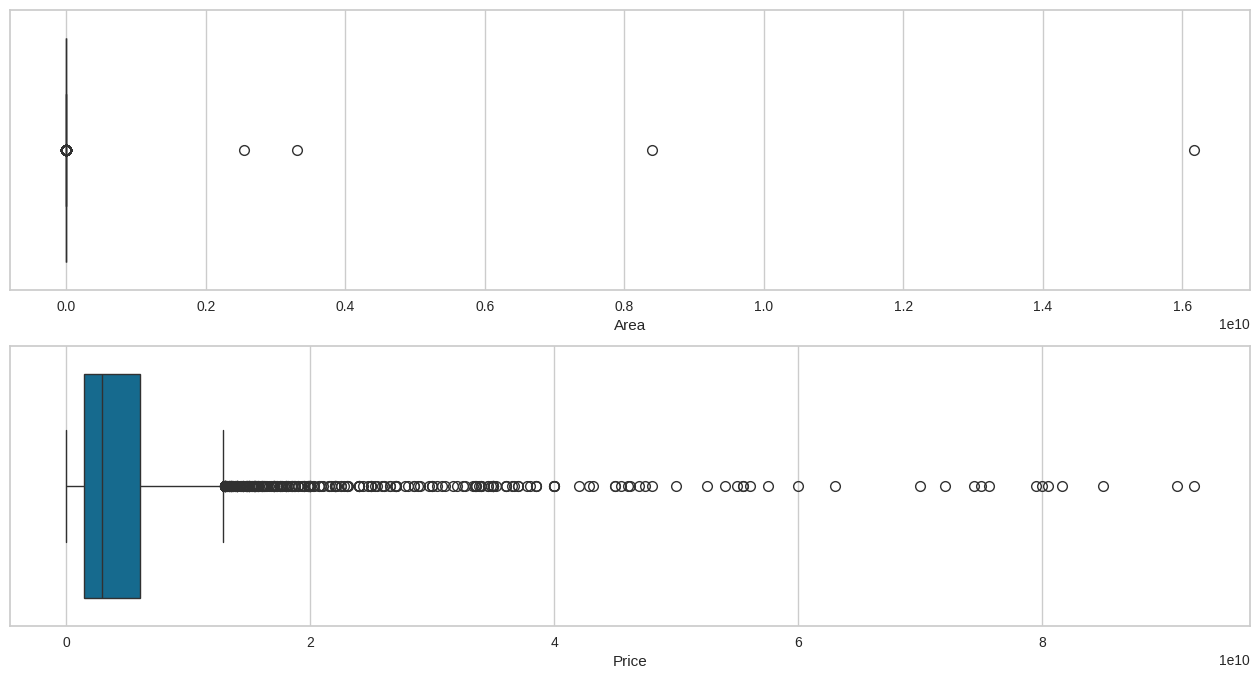

In [46]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df_final['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df_final['Price'])

In [47]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
total_outliers = np.union1d(area_outliers, price_outliers)

In [48]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2764, 197)
shape of y train: (2764,)
shape of x test: (692, 197)
shape of y train: (692,)


In [49]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)

    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return train_score, test_score, RMSE

In [50]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})


The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 60.40% for LinearRegression model.
(R2 score) in the testing set is 53.35% for LinearRegression model.
RMSE is 6,357,973,671.712957 for LinearRegression model.
--------------------
Runtime of the program is: 0.32


In [51]:
lgbm_model = LGBMRegressor(n_jobs = -1)
param_lgbm = {}
lgbm_train_score, lgbm_test_score, lgbm_RMSE = parameter_finder(lgbm_model, param_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 2764, number of used features: 41
[LightGBM] [Info] Start training from score 5225385961.516643
The best parameters for LGBMRegressor model is: {}
--------------------
(R2 score) in the training set is 81.45% for LGBMRegressor model.
(R2 score) in the testing set is 77.82% for LGBMRegressor model.
RMSE is 4,384,721,750.591583 for LGBMRegressor model.
--------------------
Runtime of the program is: 4.38


In [52]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)


The best parameters for Ridge model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Ridge model.
(R2 score) in the testing set is 53.36% for Ridge model.
RMSE is 6,357,553,945.624987 for Ridge model.
--------------------
Runtime of the program is: 0.60


In [53]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Lasso model.
(R2 score) in the testing set is 53.35% for Lasso model.
RMSE is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is: 15.32


In [54]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 59.51% for ElasticNet model.
(R2 score) in the testing set is 55.36% for ElasticNet model.
RMSE is 6,219,838,182.729824 for ElasticNet model.
--------------------
Runtime of the program is: 37.03


In [55]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 97.91% for DecisionTreeRegressor model.
(R2 score) in the testing set is 71.37% for DecisionTreeRegressor model.
RMSE is 4,980,876,315.211948 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 2.07


In [56]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 94.05% for RandomForestRegressor model.
(R2 score) in the testing set is 77.55% for RandomForestRegressor model.
RMSE is 4,411,228,714.032563 for RandomForestRegressor model.
--------------------
Runtime of the program is: 91.25


In [57]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.39% for KNeighborsRegressor model.
(R2 score) in the testing set is 63.99% for KNeighborsRegressor model.
RMSE is 5,586,254,776.237762 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 3.44


In [58]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [100,300],
             'learning_rate': [0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 97.29% for XGBRegressor model.
(R2 score) in the testing set is 76.72% for XGBRegressor model.
RMSE is 4,491,956,678.004168 for XGBRegressor model.
--------------------
Runtime of the program is: 224.73


In [59]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score,lgbm_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score,lgbm_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE,lgbm_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor','LGBMRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,1,6357973672
Ridge,1,1,6357553946
Lasso,1,1,6357953518
ElasticNet,1,1,6219838183
DecisionTreeRegressor,1,1,4980876315
RandomForestRegressor,1,1,4411228714
KNeighborsRegressor,1,1,5586254776
XGBoostRegressor,1,1,4491956678
LGBMRegressor,1,1,4384721751


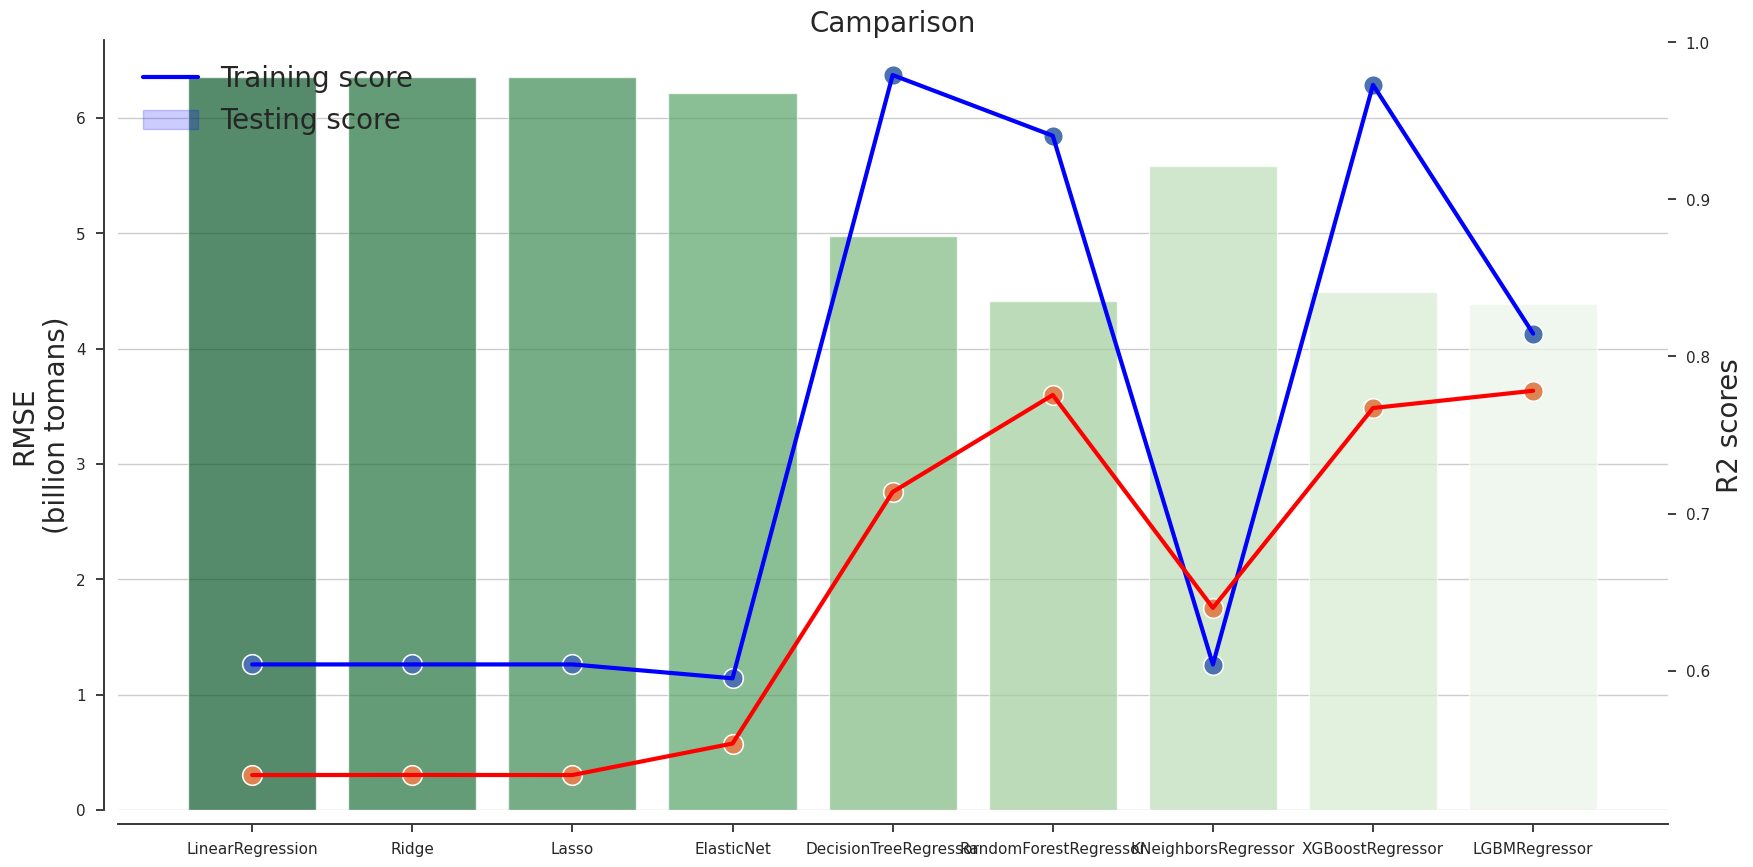

In [60]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()

[link text](https://)# Save your Model

In [61]:
my_model = 'finalized_model.joblib'
joblib.dump(lgbm_model, my_model)


['finalized_model.joblib']

In [62]:
# The data matrix
test = df.iloc[:,:-1]
# The labels
target = (df.iloc[:,-1:])
test.head()

,Area,Room,Parking,Warehouse,Elevator,Address
0,63,1,1,1,1,Shahran
1,60,1,1,1,1,Shahran
2,79,2,1,1,1,Pardis
3,95,2,1,1,1,Shahrake Qods
4,123,2,1,1,1,Shahrake Gharb


In [63]:
target.head()

,Price
0,1850000000
1,1850000000
2,550000000
3,902500000
4,7000000000


In [64]:
target_column = "Price"
categorical_cols = [c for c in test.columns if test[c].dtype in [object]]
numerical_cols = [c for c in test.columns if test[c].dtype in [float, int] ]
#boolean_cols = [c for c in test.columns if test[c].dtype in [bool] ]

print(categorical_cols)
print(numerical_cols)
#print(boolean_cols)

['Address']
['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']


In [65]:
ohe = OneHotEncoder()


In [66]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [67]:
ct = make_column_transformer(
        (ohe, categorical_cols),
        remainder='passthrough')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    test,
    target,
    test_size=1/3,
    random_state=0)

In [69]:
lgbm = LGBMRegressor()

In [70]:
pipe = Pipeline([('ct',ct),('lgbm',LGBMRegressor())])
pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Address'])])),
                ('lgbm', LGBMRegressor())])

In [71]:
pipe.fit(test,target)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 3456, number of used features: 49
[LightGBM] [Info] Start training from score 5379956885.240741


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Address'])])),
                ('lgbm', LGBMRegressor())])

In [72]:
pipe.predict(X_test)

array([5.16278516e+09, 1.33226128e+09, 1.15765045e+09, ...,
       3.53939104e+09, 6.51071194e+09, 3.58021482e+09])

In [73]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8540537675342073
Test set score: 0.8138682945532575


In [74]:
X_new = [[1000,3,1,1,1,"Pardis"]]
X2 = pd.DataFrame(X_new,columns = test.columns )
X2

,Area,Room,Parking,Warehouse,Elevator,Address
0,1000,3,1,1,1,Pardis


In [75]:
pipe.predict(X2)

array([2.43324e+10])

In [76]:
my_model = 'finalized_pipe_model.joblib'
joblib.dump(pipe, my_model)

['finalized_pipe_model.joblib']

In [77]:
model = joblib.load('finalized_pipe_model.joblib')
# Address,Area,Parking,Elevator,Warehouse
Columns = [ "Area", "Room", "Parking", "Warehouse", 'Elevator',"Address"]
Address = "Darakeh"
Area = 100000
Room = 3
Parking = "Yes"
Elevator = "No"
Warehouse = "Yes"

Elevator = int(Elevator == "Yes")
Parking = int(Parking == "Yes")
Warehouse = int(Warehouse == "Yes")

final_vec = [Area, Room, Parking, Warehouse, Elevator, Address]
#row = np.array(final_vec)
X = pd.DataFrame([final_vec], columns = Columns)
prediction = model.predict(X)
print(prediction)


[1.41768524e+10]
